In [1]:
import numpy as np
import sys


# probability of precipitation

def threshold_for_occurrence(dref, dtar, mode=1, upperbound=2):
    # dref is station prcp and >0 means positive precipitation
    # mode 1: objective is that dref and dtar have the same number of precipitation events
    # mode 2: objective is to get max CSI of dtar

    indnan = (np.isnan(dref)) | (np.isnan(dtar))
    if np.sum(indnan) > 0:
        dref = dref[~indnan]
        dtar = dtar[~indnan]

    if len(dtar) < 1:
        threshold = np.nan
    else:
        num1 = np.sum(dref > 0)
        if num1 == 0:
            threshold = np.max(dtar) + 0.1
        else:
            if mode == 1:
                indnan = (dtar == 0) | (np.isnan(dtar))
                dtar = dtar[~indnan]
                if len(dtar) <= num1:
                    threshold = 0
                else:
                    dtars = np.flip(np.sort(dtar))
                    threshold = (dtars[num1] + dtars[num1 - 1]) / 2
            elif mode == 2:
                step = 0.05
                num = int(upperbound / step) + 1
                csi = np.zeros(num)
                for i in range(num):
                    threi = i * step
                    n11 = np.sum((dref > 0) & (dtar > threi))
                    n10 = np.sum((dref <= 0) & (dtar > threi))
                    n01 = np.sum((dref > 0) & (dtar <= threi))
                    csii = n11 / (n11 + n01 + n10)
                    csi[i] = csii
                indi = np.nanargmax(csi)
                threshold = indi * step
            else:
                sys.exit('Unknown mode for threshold estimation')

    if threshold > upperbound:
        threshold = upperbound

    return threshold


def cal_csi(Obs, Pre, Tre=0):
    # Tre: rain/no rain threshold
    # POD(Probability of Detection),FOH(frequency of hit)
    # FAR(False Alarm Ratio), CSI(Critical Success Index)
    # HSS(Heidke skillscore),Ebert et al. [2007]
    if len(Obs) > 1:
        n11 = np.sum((Obs > Tre) & (Pre > Tre))
        n10 = np.sum((Obs <= Tre) & (Pre > Tre))
        n01 = np.sum((Obs > Tre) & (Pre <= Tre))
        # n00 = np.sum((Obs <= Tre) & (Pre <= Tre))
    # try:
    #     POD = n11 / (n11 + n01)
    # except:
    #     POD = np.nan
    # try:
    #     FOH = n11 / (n11 + n10)
    #     FAR = n10 / (n11 + n10)
    # except:
    #     FOH = np.nan
    #     FAR = np.nan
    try:
        CSI = n11 / (n11 + n01 + n10)
    except:
        CSI = np.nan
    # try:
    #     HSS = 2 * (n11 * n00 - n10 * n01) / ((n11 + n01) *
    #                                          (n01 + n00) + (n11 + n10) * (n10 + n00))
    # except:
    #     HSS = np.nan
    #
    # contingency_group = {'POD': POD, 'FOH': FOH, 'FAR': FAR,
    #                      'CSI': CSI, 'HSS': HSS}
    return CSI



# main
filestn = '/Users/localuser/Downloads/stndata_whole.npz'
filerea = '/Users/localuser/Research/Test/mergecorr_prcp_RMSE.npz'
maxthreshold = 2

d1 = np.load(filestn)
d2 = np.load(filerea)

stndata = d1['prcp_stn']
readata = d2['reacorr_stn']


reanum, nstn, ntimes = np.shape(readata)
# 1. get threshold for precipitation occurrence
rea_threshold1 = np.nan * np.zeros([nstn, reanum])
rea_threshold2 = np.nan * np.zeros([nstn, reanum])
rea_csi1 = np.nan * np.zeros([nstn, reanum])
rea_csi2 = np.nan * np.zeros([nstn, reanum])

NameError: name 'mod' is not defined

In [3]:
for r in range(reanum):
    for i in range(nstn):
        if np.mod(i,1000)==0:
            print('r i',r,i)
        if not np.isnan(stndata[i, 0]):
            dobs = stndata[i, :]
            drea = readata[r, i, :].copy()
            rea_threshold1[i, r] = threshold_for_occurrence(dobs, drea, mode=1, upperbound=maxthreshold)
            rea_threshold2[i, r] = threshold_for_occurrence(dobs, drea, mode=2, upperbound=maxthreshold)

            drea1 = drea.copy()
            drea1[drea1 <rea_threshold1[i, r]] = 0
            rea_csi1[i, r] = cal_csi(dobs, drea1)
            drea2 = drea.copy()
            drea2[drea2 <rea_threshold2[i, r]] = 0
            rea_csi2[i, r] = cal_csi(dobs, drea2)

r i 0 0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


r i 0 1000
r i 0 2000
r i 0 3000


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in long_scalars


r i 0 4000
r i 0 5000
r i 0 6000
r i 0 7000
r i 0 8000
r i 0 9000
r i 0 10000
r i 0 11000
r i 0 12000
r i 0 13000
r i 0 14000
r i 0 15000
r i 0 16000
r i 0 17000
r i 0 18000
r i 0 19000
r i 0 20000
r i 0 21000
r i 0 22000
r i 0 23000
r i 0 24000
r i 0 25000
r i 0 26000
r i 0 27000
r i 1 0
r i 1 1000
r i 1 2000
r i 1 3000
r i 1 4000
r i 1 5000
r i 1 6000
r i 1 7000
r i 1 8000
r i 1 9000
r i 1 10000
r i 1 11000
r i 1 12000
r i 1 13000
r i 1 14000
r i 1 15000
r i 1 16000
r i 1 17000
r i 1 18000
r i 1 19000
r i 1 20000
r i 1 21000
r i 1 22000
r i 1 23000
r i 1 24000
r i 1 25000
r i 1 26000
r i 1 27000
r i 2 0
r i 2 1000
r i 2 2000
r i 2 3000
r i 2 4000
r i 2 5000
r i 2 6000
r i 2 7000
r i 2 8000
r i 2 9000
r i 2 10000
r i 2 11000
r i 2 12000
r i 2 13000
r i 2 14000
r i 2 15000
r i 2 16000
r i 2 17000
r i 2 18000
r i 2 19000
r i 2 20000
r i 2 21000
r i 2 22000
r i 2 23000
r i 2 24000
r i 2 25000
r i 2 26000
r i 2 27000


In [60]:
pop_reamerge = np.nan * np.zeros([nstn, ntimes], dtype=np.float32)
for i in range(nstn):
    if np.mod(i, 1000) == 0:
        print('i', i)
    if not np.isnan(stndata[i, 0]):
        csii = rea_csi[i, :]
        weighti = csii ** 2  # weight formulation
        weighti = np.tile(weighti, (ntimes, 1)).T
        popi = np.zeros([reanum, ntimes])
        for r in range(reanum):
            pr = readata[r, i, :].copy()
            pr[pr < rea_threshold[i, r]] = 0
            pr[pr >= rea_threshold[i, r]] = 1
            popi[r, :] = pr
        weighti[np.isnan(popi)] = 0  # MERRA2 does not have data for 1979
        popi2 = np.nansum(weighti * popi, axis=0) / np.sum(weighti, axis=0)
        pop_reamerge[i, :] = popi2

np.savez_compressed(outfile,pop_reamerge=pop_reamerge,rea_threshold=rea_threshold,rea_csi=rea_csi,stn_lle=stn_lle)


i 0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater_equal
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


i 1000
i 2000
i 3000
i 4000
i 5000
i 6000
i 7000
i 8000
i 9000
i 10000
i 11000
i 12000
i 13000
i 14000
i 15000
i 16000
i 17000
i 18000
i 19000
i 20000
i 21000
i 22000
i 23000
i 24000
i 25000
i 26000
i 27000


Text(0.5, 1.0, 'Station occurrence (>0)')

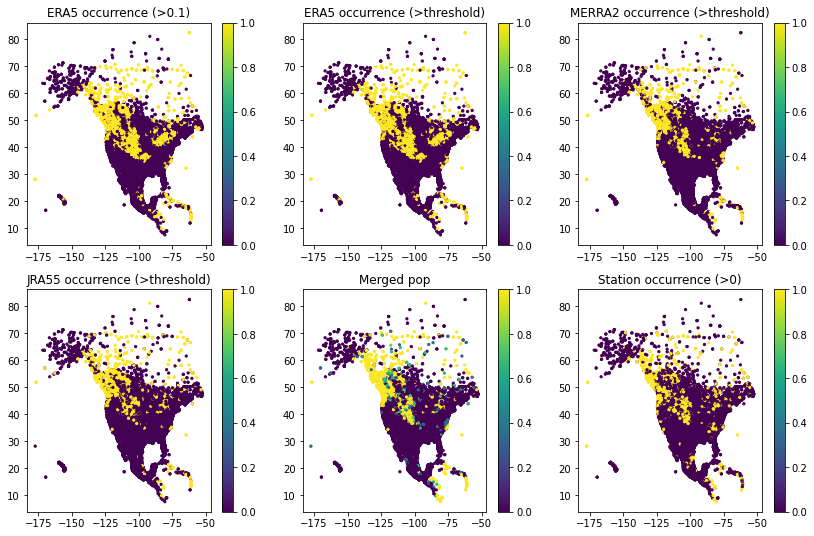

In [88]:
plt.figure(figsize=[14,9])
day=366

plt.subplot(231)
rr = 0
dd=readata[rr,:,day]
dd[dd>0.1]=1
dd[dd<=0.1]=0
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dd)
plt.colorbar()
plt.clim([0,1])
plt.title('ERA5 occurrence (>0.1)')

plt.subplot(232)
rr = 0
dd=readata[rr,:,day]
dd[dd<=rea_threshold[:,rr]]=0
dd[dd>rea_threshold[:,rr]]=1
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dd)
plt.colorbar()
plt.clim([0,1])
plt.title('ERA5 occurrence (>threshold)')

plt.subplot(233)
rr = 1
dd=readata[rr,:,day]
dd[dd<=rea_threshold[:,rr]]=0
dd[dd>rea_threshold[:,rr]]=1
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dd)
plt.colorbar()
plt.clim([0,1])
plt.title('MERRA2 occurrence (>threshold)')

plt.subplot(234)
rr = 2
dd=readata[rr,:,day]
dd[dd<=rea_threshold[:,rr]]=0
dd[dd>rea_threshold[:,rr]]=1
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dd)
plt.colorbar()
plt.clim([0,1])
plt.title('JRA55 occurrence (>threshold)')

plt.subplot(235)
dd=pop_reamerge[:,day]
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dd)
plt.colorbar()
plt.clim([0,1])
plt.title('Merged pop')

plt.subplot(236)
rr = 0
dd=stndata[:,day]
dd[dd>0]=1
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dd)
plt.colorbar()
plt.clim([0,1])
plt.title('Station occurrence (>0)')